<a href="https://colab.research.google.com/github/NiharikaAmritkar/AI-ML/blob/main/house_predictions_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<ipython-input-5-c563e8cfa976>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

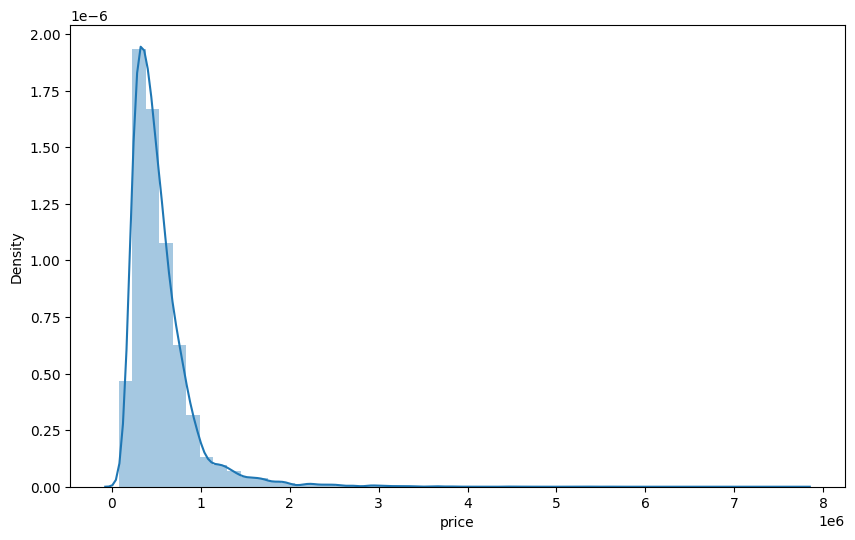

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

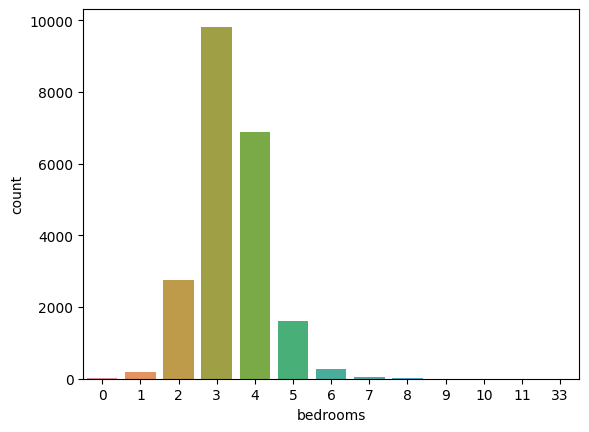

In [ ]:
sns.countplot(data=df, x= 'bedrooms')

In [ ]:
#finding the correlation
df.corr()['price'].sort_values()

<ipython-input-11-1677db30c2d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

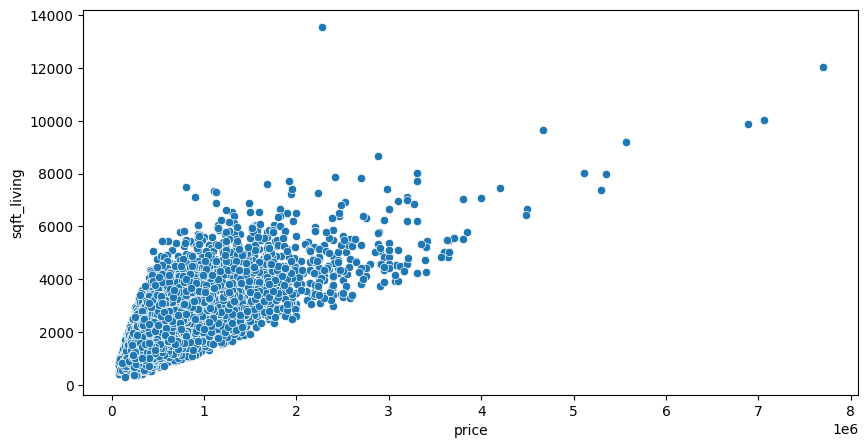

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x= 'price', y='sqft_living', data= df)

<Axes: xlabel='bedrooms', ylabel='price'>

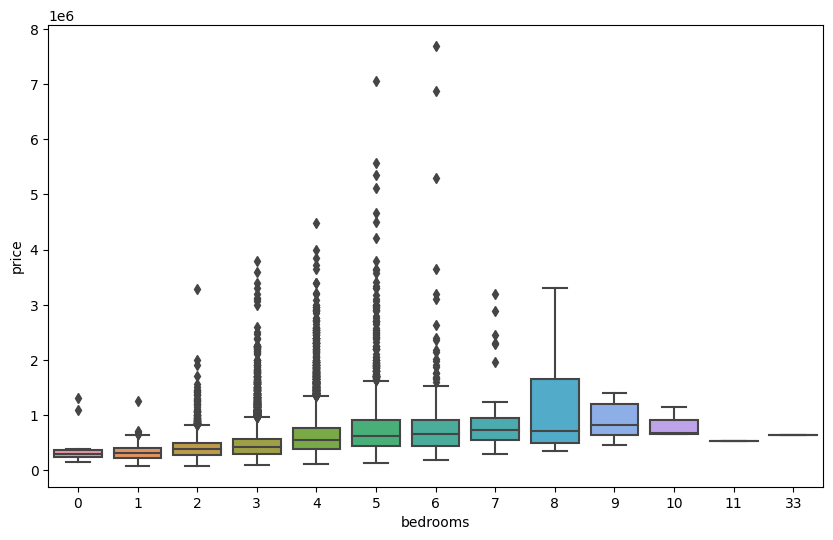

In [ ]:
#distributionof prices per bedroom
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data= df)

<Axes: xlabel='price', ylabel='lat'>

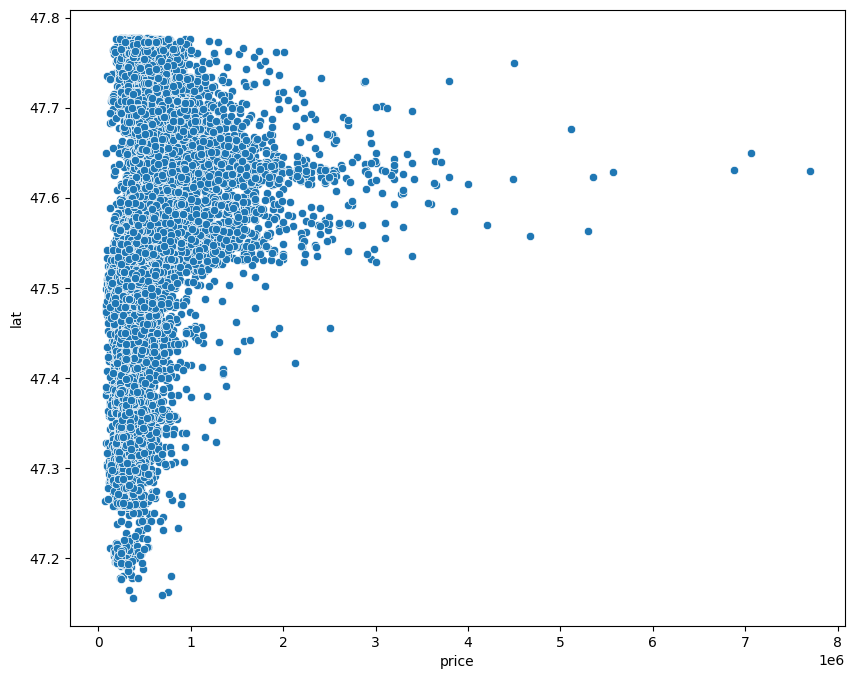

In [ ]:
#plotting scatter plot of price vs lattitude and logitutde
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='lat', data= df)

<Axes: xlabel='price', ylabel='long'>

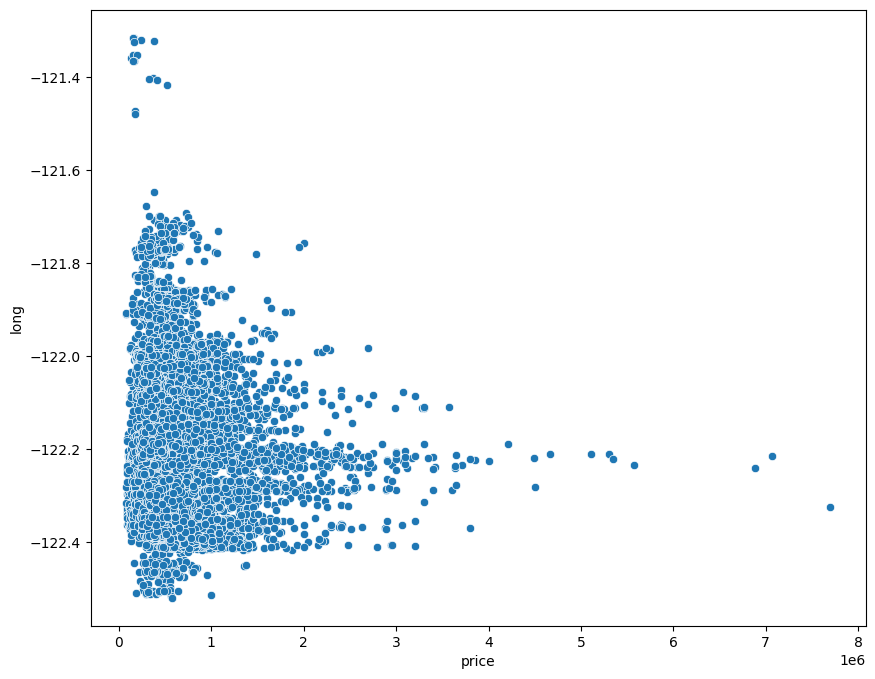

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='long', data= df)

due to outliers, we did not much of colour gradient


<Axes: xlabel='long', ylabel='lat'>

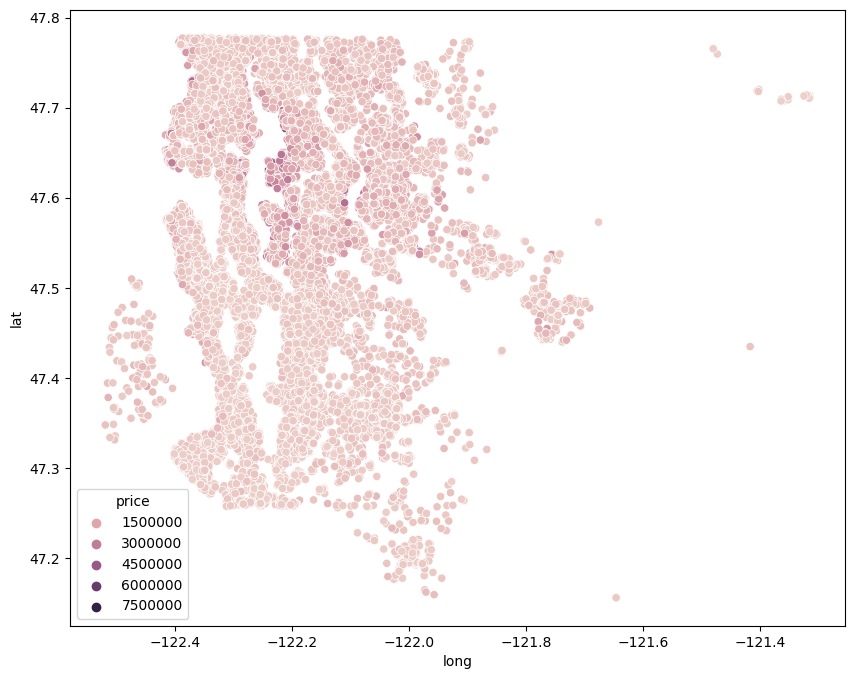

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data= df, hue='price') #we can check this plot with the map of kings country

In [ ]:
df.sort_values('price', ascending= False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
#sampling out top 1% of the houses
len(df)
len(df)*0.01

216.13

In [ ]:
non_top_1_percent= df.sort_values('price', ascending= False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

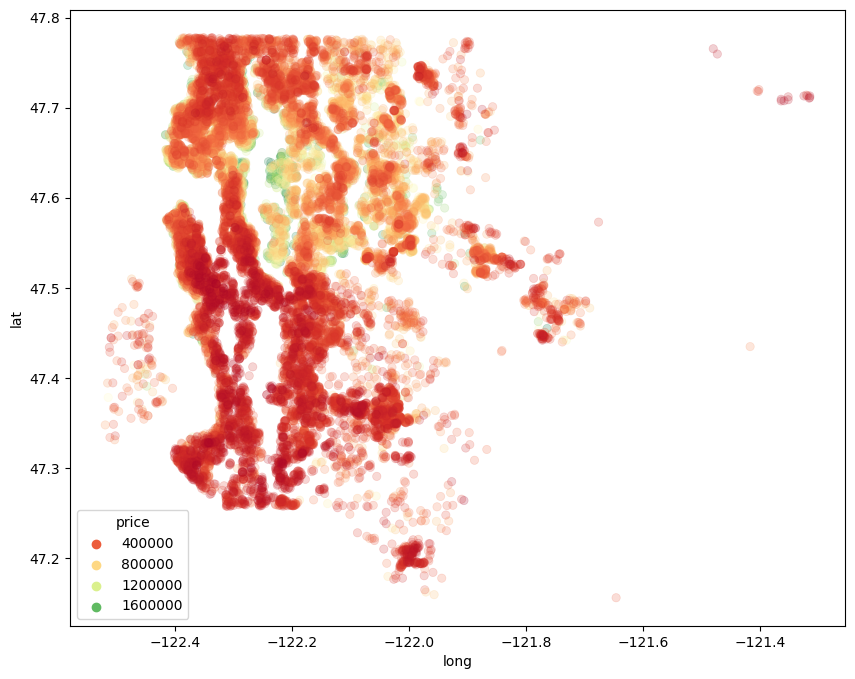

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data= non_top_1_percent,
                edgecolor=None, alpha= 0.2, palette= 'RdYlGn', hue='price')

<Axes: xlabel='waterfront', ylabel='price'>

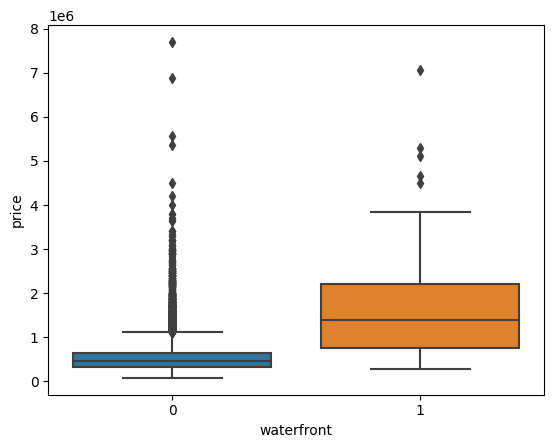

In [ ]:
#waterfront houses
sns.boxplot(x='waterfront', y= 'price', data=df)

In [ ]:
#dropping unnecessary column
df= df.drop('id', axis= 1)

In [ ]:
#converting date in dattime object
df['date']= pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
#extracting month and year from date
df['year']= df['date'].apply(lambda date: date.year)
df['month']= df['date'].apply(lambda date: date.month)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

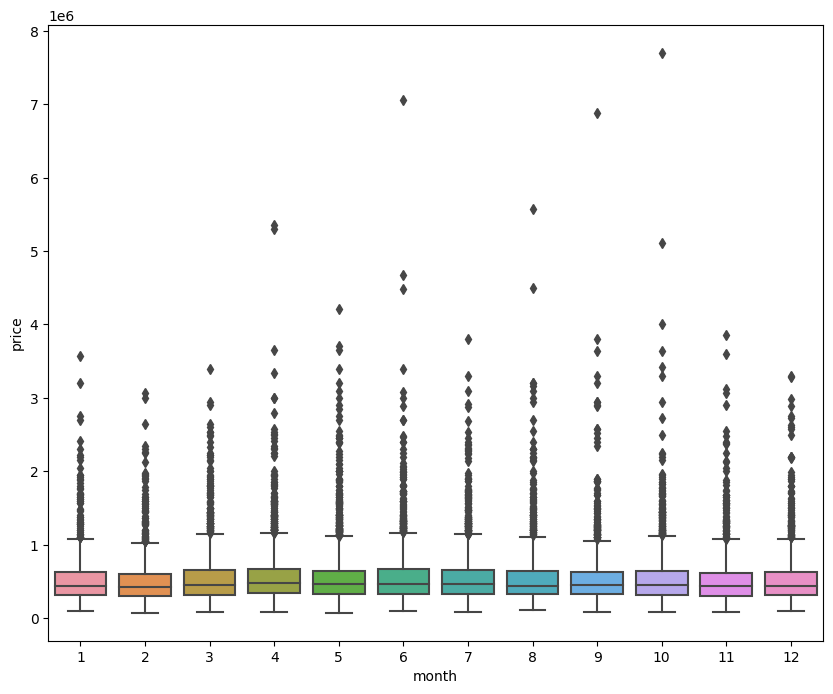

In [ ]:
#plotting boxplot for month vs price
plt.figure(figsize=(10, 8))
sns.boxplot(x='month', y= 'price', data= df)

<ipython-input-40-fee831ba9367>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

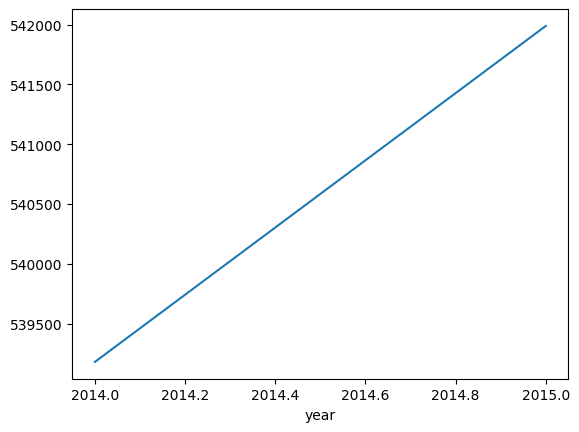

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
#thud droping the date column
df= df.drop('date', axis= 1)


KeyError: ignored

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
df= df.drop('zipcode', axis= 1)

In [ ]:
x= df.drop('price', axis= 1).values
y= df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=101 )

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [ ]:
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model= Sequential()

In [ ]:
x_train.shape #19 features= 19 neurons

(15129, 19)

In [ ]:
model.add(Dense(19, activation ='relu'))
model.add(Dense(19, activation ='relu'))
model.add(Dense(19, activation ='relu'))
model.add(Dense(19, activation ='relu'))

model.add(Dense(1)) #output layer
model.compile(optimizer='adam', loss='mse') #this is a regression problem hence chosing a coninuous label loss function

In [ ]:
model.fit(x= x_train, y= y_train,
          validation_data= (x_test, y_test),
          batch_size= 128,
          epochs= 400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 423625687040.0000 - val_loss: 432999333888.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 422245662720.0000 - val_loss: 427966791680.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 401884807168.0000 - val_loss: 379813494784.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 303893643264.0000 - val_loss: 225491894272.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 147767476224.0000 - val_loss: 110824382464.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100236656640.0000 - val_loss: 103914971136.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97944576000.0000 - val_loss: 102210052096.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96362749952.0000 - val_loss: 100484022272.0000
Epoch 9/400
119/11

In [ ]:
losses= pd.DataFrame(model.history.history)

<Axes: >

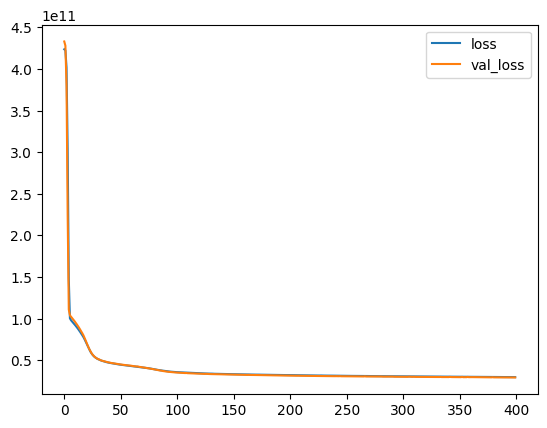

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
predictions= model.predict(x_test)

203/203 [==============================] - 1s 2ms/step


In [ ]:
predictions

array([[510983.97],
       [655309.25],
       [505486.84],
       ...,
       [445703.1 ],
       [213261.6 ],
       [953774.6 ]], dtype=float32)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

170886.10233522893

In [ ]:
mean_absolute_error(y_test, predictions)

105952.01699616363

In [ ]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
 5.400881e+05

540088.1

In [ ]:
explained_variance_score(y_test, predictions)

0.7919144897630749

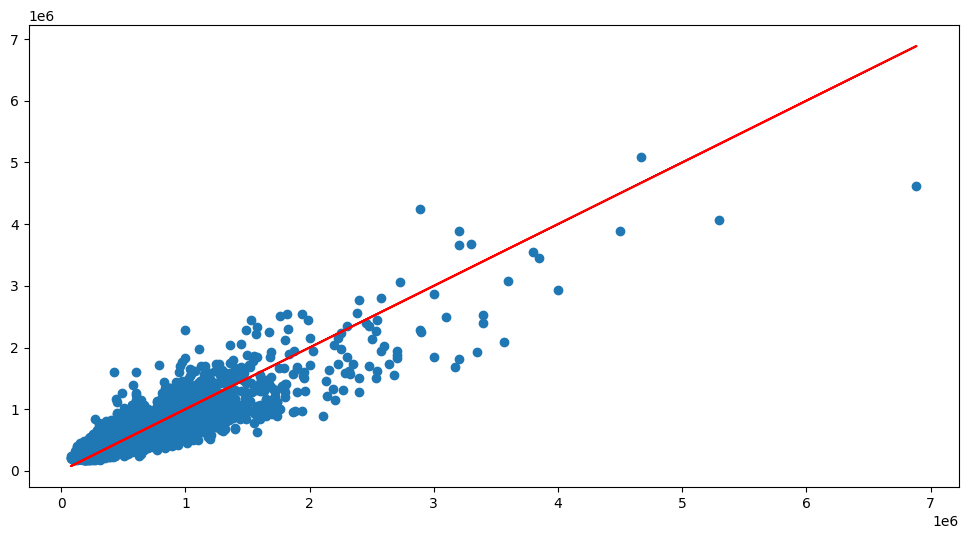

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [ ]:
#how to predict the price using the trainind model
single_house= df.drop('price', axis= 1).iloc[0]

In [ ]:
#reshaping to fit
single_house= scaler.transform(single_house.values.reshape(-1, 19)) #-1 means kkeeping all dimensions along that axis

In [ ]:
model.predict(single_house)

1/1 [==============================] - 0s 26ms/step


array([[275792.84]], dtype=float32)

In [ ]:
df.head(1) #overshooting the results, hence need to retrain the model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
